In [1]:
# Load packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from load_and_utility_functions import *

# --- Matplotlib RCParams for IEEE Sans-Serif Figures ---
matplotlib.rcParams.update({
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    "lines.linewidth": 2,      # Default line width
    "axes.linewidth": 1.5,       # Axes border width
    "grid.linewidth": 0.8,       # Grid line width
    "xtick.major.width": 2.0,    # Tick width
    "ytick.major.width": 2.0,
})

# Definitions
path_fig = "./figures/"
save_figure = True # Set to False if you don't want to save the figures as files

### Simple AC Magnitude Plot

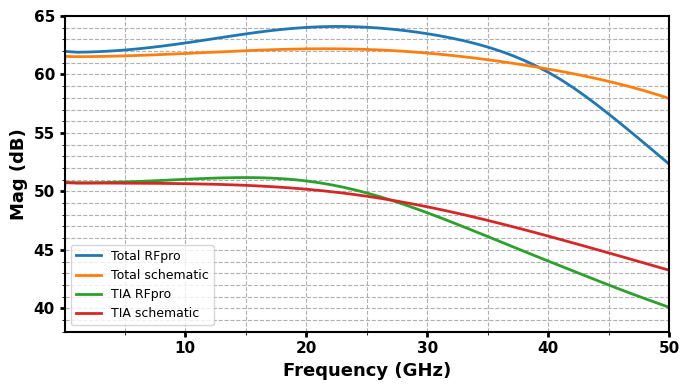

In [2]:
SG25H5_RFpro_AC = np.genfromtxt('./cadence_export/RFpro_AC_transferfunc.vcsv',delimiter=',',skip_header=6)
SG25H5_schem_AC = np.genfromtxt('./cadence_export/schematic_AC.vcsv',delimiter=',',skip_header=6)

#
# plt.style.use('default')
fig, ax = plt.subplots(figsize=[7, 4])
ax.plot(SG25H5_RFpro_AC[:,0]/1e9,SG25H5_RFpro_AC[:,3*2+1].T) # Total RFpro
ax.plot(SG25H5_schem_AC[:,0]/1e9,SG25H5_schem_AC[:,7*2+1].T) # Total
ax.plot(SG25H5_RFpro_AC[:,0]/1e9,SG25H5_RFpro_AC[:,1*2+1].T) # TIA RFpro
ax.plot(SG25H5_schem_AC[:,0]/1e9,SG25H5_schem_AC[:,1*2+1].T) # TIA



#ax.axhline(-3,c='C0',ls="--")
ax.grid(True,which="both",ls="--")
ax.set_xlim(0.04,50)
ax.set_ylim(38,65)
ax.set_xlabel('Frequency (GHz)',fontsize=13, fontweight='bold')
ax.set_ylabel('Mag (dB)',fontsize=13, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.legend(['Total RFpro','Total schematic','TIA RFpro','TIA schematic'],loc='lower left',fontsize=9)

# --- Bold axis tick labels ---
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontweight('bold')

plt.tight_layout()
if save_figure:
    os.makedirs(path_fig, exist_ok=True)
    plt.savefig(path_fig+"RFpro_vs_schematic_AC_magnitude.pdf")

### Simple Transient Plot

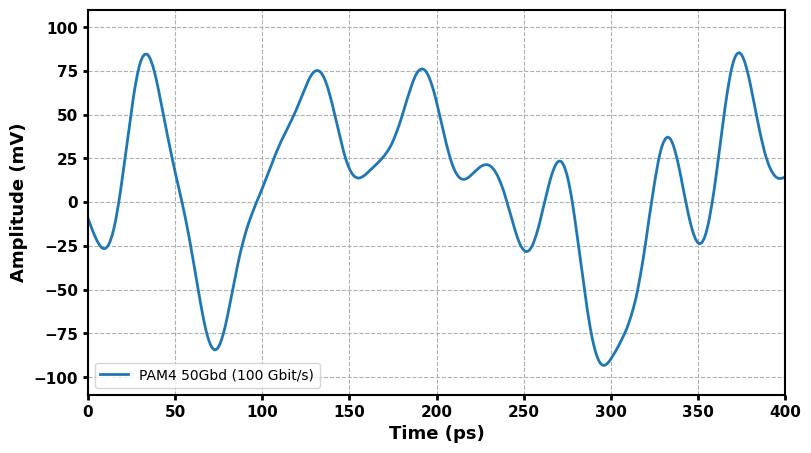

In [5]:
# Load waveform data (time in s, voltage in V)
data = np.genfromtxt('./cadence_export/RFpro_tran_eye_PAM4_50Gbd.vcsv', delimiter=',', skip_header=6)
time_s = data[:, 0]
voltage_v = data[:, 1]

# Define parameters
baud_rate = 50e9  # 50 Gbaud PAM4 → 2 bits/symbol
symbol_period = 1 / baud_rate  # Symbol duration in seconds
plot_window = 20*symbol_period # plot e.g. 10 symbol periods
# Define a start time by yourself!
t_start = 5e-10 # Skip transient + offset
t_end = t_start + plot_window

# Prepare plot
fig, ax = plt.subplots(figsize=(9, 5))
mask = (time_s >= t_start) & (time_s < t_end)
t_window = (time_s[mask] - t_start) * 1e12  # Convert to ps
v_window = voltage_v[mask] * 1e3            # Convert to mV
ax.plot(t_window, v_window)

# Style plot
# ax.set_title("PAM4 50 Gbaud (100 Gbit/s)", fontsize=14) # optional
ax.grid(True,which="both",ls="--")
ax.set_xlim(0, plot_window * 1e12)
ax.set_ylim(-110,110)
ax.set_xlabel('Time (ps)', fontsize=13, fontweight='bold')
ax.set_ylabel('Amplitude (mV)', fontsize=13, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=11)
ax.legend(['PAM4 50Gbd (100 Gbit/s)'],loc='lower left',fontsize=10)

# --- Bold axis tick labels ---
for tick in ax.get_xticklabels() + ax.get_yticklabels():
    tick.set_fontweight('bold')

if save_figure:
    os.makedirs(path_fig, exist_ok=True)
    fig.savefig(os.path.join(path_fig, "RFpro_transient_PAM4_50Gbd.pdf"))

### Eye Diagam

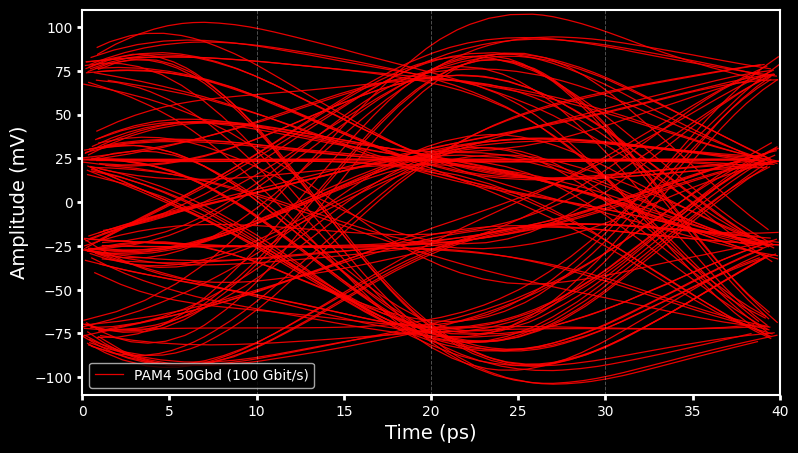

In [4]:
# Load waveform data (time in s, voltage in V)
data = np.genfromtxt('./cadence_export/RFpro_tran_eye_PAM4_50Gbd.vcsv', delimiter=',', skip_header=6)
time_s = data[:, 0]
voltage_v = data[:, 1]

# Define parameters
baud_rate = 50e9  # 50 Gbaud PAM4 → 2 bits/symbol
symbol_period = 1 / baud_rate  # Symbol duration in seconds
eye_periode = 2*symbol_period # Eye-Diagram shows 2 symbol periods
# Define a start time by yourself!
eye_start_time = 5e-10 + 9e-12 #  # Skip transient + eye alignment

# Puse dark background, automatically revert to previous settings afterwards
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(9, 5))

    # Compute number of symbols to display
    num_symbols = int(np.floor((time_s[-1] - eye_start_time) * baud_rate))

    # Plot each symbol overlay
    for idx in range(num_symbols):
        t_start = eye_start_time + idx * eye_periode
        t_end = t_start + eye_periode

        mask = (time_s >= t_start) & (time_s < t_end)
        t_window = (time_s[mask] - t_start) * 1e12  # Convert to ps
        v_window = voltage_v[mask] * 1e3            # Convert to mV

        ax.plot(t_window, v_window, color='red', alpha=0.9, lw=0.9)

    # ax.set_title("Eye Diagram: PAM4 50 Gbaud (100 Gbit/s)", fontsize=14) # optional
    ax.legend(['PAM4 50Gbd (100 Gbit/s)'],loc='lower left',fontsize=10) 
    plt.xlim(0, eye_periode * 1e12)
    plt.ylim(-110,110)
    plt.xlabel('Time (ps)', fontsize=14)
    plt.ylabel('Amplitude (mV)', fontsize=14)

    ui_ps = eye_periode * 1e12  # UI in ps
    for frac in [0.25, 0.5, 0.75]:
        ax.axvline(frac * ui_ps, color='white', linestyle='--', alpha=0.3, lw=0.7)

    if save_figure:
        os.makedirs(path_fig, exist_ok=True)
        fig.savefig(os.path.join(path_fig, "RFpro_tran_eye_PAM4_50Gbd.pdf"))